# Understanding the Amazon from Space
See Kaggle comp [here](https://www.kaggle.com/c/planet-understanding-the-amazon-from-space)

In [17]:
# Imports and set constants
import os
import random
import shutil
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
PATH = "../../../../data/planet/"

def get_path(filename=''): return f'{PATH}train/{filename}'
def get_files(): return os.listdir(get_path())

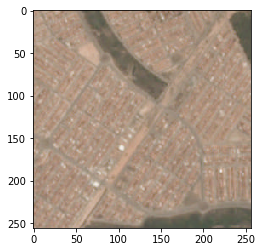

In [2]:
# Sample a random of image - they all seem to be exactly 250x250px
image_filename = random.choice(get_files())
img = plt.imread(get_path(image_filename))
plt.imshow(img)

In [23]:
# Training imports and constants
from fastai.dataset import ImageClassifierData, get_cv_idxs
from fastai.model import resnet34
from fastai.transforms import tfms_from_model, transforms_top_down
from fastai.conv_learner import ConvLearner
from sklearn.metrics import fbeta_score
import warnings

def f2(preds, targs, start=0.17, end=0.24, step=0.01):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        return max([
            fbeta_score(targs, (preds>th), 2, average='samples')
            for th in np.arange(start,end,step)
        ])

BATCH_SIZE=64
ARCH=resnet34
METRICS=[f2]

In [24]:
def get_data(size, batch_size):
    transforms = tfms_from_model(ARCH, size, aug_tfms=transforms_top_down, max_zoom=1.1)
    return ImageClassifierData.from_csv(
        path=PATH,
        folder='train', 
        csv_fname=f'{PATH}train_v2.csv',
        bs=batch_size,
        tfms=transforms,
        suffix='.jpg',
        test_name='test',
    )

In [25]:
IMG_SIZE=64
data = get_data(IMG_SIZE, BATCH_SIZE)

In [26]:
learn = ConvLearner.pretrained(ARCH, data, metrics=METRICS)

In [27]:
# Find learning rate
learn.lr_find()

epoch      trn_loss   val_loss   f2                          
    0      0.220397   0.281284   0.819403  



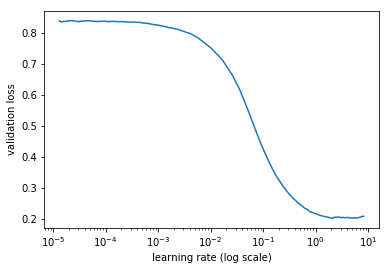

In [9]:
# Plot validation loss as a function of learning rate
learn.sched.plot()

In [28]:
# Let's pick 0.1
LEARNING_RATE = 0.1

In [29]:
learn.fit(LEARNING_RATE, n_cycle=3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2                          
    0      0.153347   0.135922   0.881041  
    1      0.144373   0.128108   0.887677                    
    2      0.138846   0.125884   0.89125                     
    3      0.139095   0.123838   0.892072                    
    4      0.134519   0.122168   0.894419                    
    5      0.135612   0.120756   0.896594                    
    6      0.133668   0.120632   0.896291                    



[array([0.12063]), 0.8962913577028171]

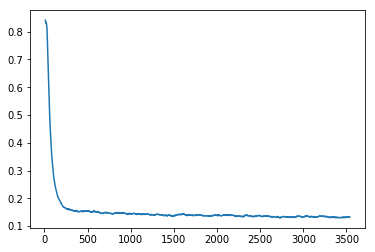

In [30]:
learn.sched.plot_loss()

In [31]:
# Unfreeze all layers, re-investigate learning rate
learn.unfreeze()
learn.lr_find()

epoch      trn_loss   val_loss   f2                          
    0      0.269119   0.531802   0.564398  



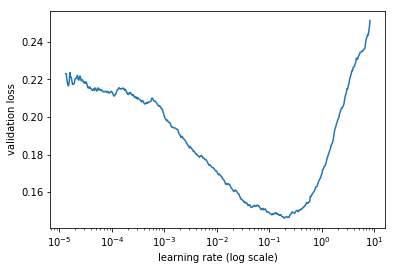

In [32]:
learn.sched.plot()

In [33]:
learning_rates = np.array([LEARNING_RATE/9,LEARNING_RATE/3,LEARNING_RATE])
learn.fit(learning_rates, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2                          
    0      0.117521   0.107631   0.910537  
    1      0.112887   0.101847   0.912759                    
    2      0.108785   0.09798    0.917827                    
    3      0.107601   0.098394   0.917325                    
    4      0.10189    0.09532    0.921022                    
    5      0.100942   0.09404    0.920633                     
    6      0.098576   0.093614   0.920584                     



[array([0.09361]), 0.9205844977284346]

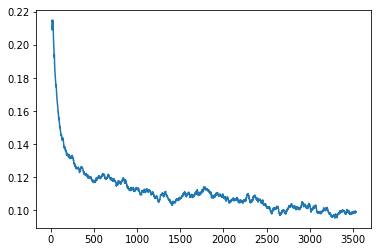

In [34]:
learn.sched.plot_loss()

In [35]:
IMG_SIZE=128
data = get_data(IMG_SIZE, BATCH_SIZE)
learn.set_data(data)

In [36]:
learn.freeze()
learn.fit(LEARNING_RATE, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2                           
    0      0.098775   0.093807   0.920657  
    1      0.102731   0.092786   0.920867                     
    2      0.095733   0.092491   0.922088                     
    3      0.098237   0.092915   0.921099                     
    4      0.100143   0.091952   0.921942                     
    5      0.097982   0.090958   0.922703                     
    6      0.096963   0.090856   0.923463                     



[array([0.09086]), 0.9234628598556328]

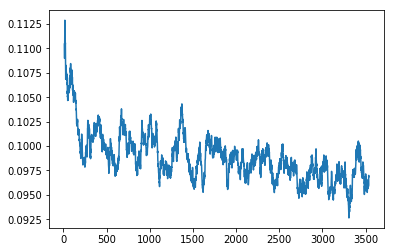

In [37]:
learn.sched.plot_loss()

In [38]:
learn.unfreeze()
learn.fit(learning_rates, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2                           
    0      0.097014   0.087863   0.926452  
    1      0.097263   0.088272   0.92456                      
    2      0.089655   0.085202   0.927997                     
    3      0.093384   0.086906   0.926695                     
    4      0.08863    0.086157   0.92682                      
    5      0.084979   0.084954   0.928972                     
    6      0.086451   0.084539   0.929569                     



[array([0.08454]), 0.9295690111371783]

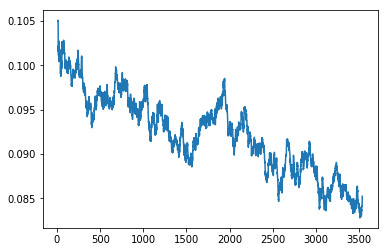

In [39]:
learn.sched.plot_loss()

In [40]:
IMG_SIZE=256
data = get_data(IMG_SIZE, BATCH_SIZE)
learn.set_data(data)

In [41]:
learn.freeze()
learn.fit(LEARNING_RATE, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2                           
    0      0.094924   0.089208   0.924436  
    1      0.092611   0.088764   0.924284                     
    2      0.093152   0.088099   0.92528                      
    3      0.093068   0.088808   0.924333                     
    4      0.092001   0.088084   0.925959                     
    5      0.09152    0.088087   0.925192                     
    6      0.088744   0.087446   0.926021                     



[array([0.08745]), 0.9260212722110708]

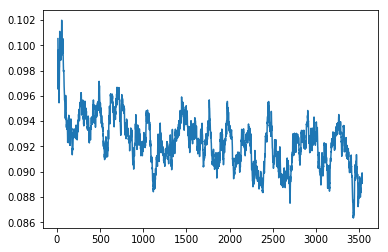

In [42]:
learn.sched.plot_loss()

In [43]:
learn.unfreeze()
learn.fit(learning_rates, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2                           
    0      0.087939   0.084681   0.928851  
    1      0.08988    0.083791   0.93091                      
    2      0.085503   0.08277    0.930126                     
    3      0.087542   0.084656   0.928921                     
    4      0.088569   0.083255   0.930849                     
    5      0.082427   0.082447   0.931608                     
    6      0.0803     0.082044   0.931684                     



[array([0.08204]), 0.9316841618055909]

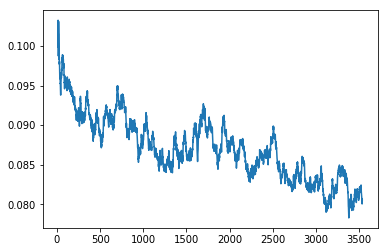

In [44]:
learn.sched.plot_loss()

In [45]:
learn.save('amazon-from-space-v1')

In [46]:
learn.load('amazon-from-space-v1')

In [48]:
# Finished training - submit to Kaggle
# Get test set predictions using test time augmentation (TTA)
log_preds, y = learn.TTA(is_test=True)

In [90]:
"""
Submission is a csv with format:

    image_name,tags
    test_0,primary clear agriculture road water
    test_1,primary clear agriculture road water
    test_2,primary clear agriculture road water
"""
import pandas as pd
# Input: 5 augmentations x ~40k samples x 17 categories
# Output: ~40k samples x 17 categories
probs = np.mean(log_preds,0)
# Input: ~40k samples x 17 categories
# Input: Array of ~40k strings, which are space delimited class predictions
CUTOFF = 0.5
classes = np.array(data.classes)
preds = []
for sample in probs:
    prediction = ' '.join(np.extract(sample > CUTOFF, data.classes))
    preds.append(prediction)

# Get ID for each prediction
ids = [f.replace('test/', '').replace('.jpg', '') for f in data.test_ds.fnames]

results = np.array(list(zip(ids, preds)))
df = pd.DataFrame(results)
df.columns = ('image_name', 'tags')
df.head(20)

,image_name,tags
0,test_25202,agriculture partly_cloudy primary
1,test_5717,clear cultivation habitation primary
2,test_40598,agriculture clear primary road
3,test_35442,agriculture clear primary water
4,test_22859,primary
5,test_13670,haze primary
6,test_3503,clear primary
7,test_34533,agriculture clear primary
8,test_22003,partly_cloudy primary
9,test_18026,cloudy


In [92]:
from IPython.lib.display import FileLink
SUBMISSION = f'{PATH}submission.csv'
df.to_csv(SUBMISSION, index=False)
FileLink(SUBMISSION)

/home/paperspace/data/planet/submission.csv

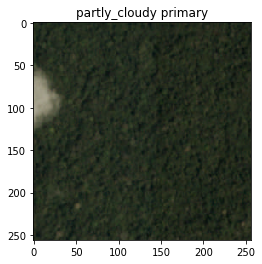

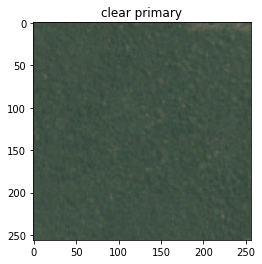

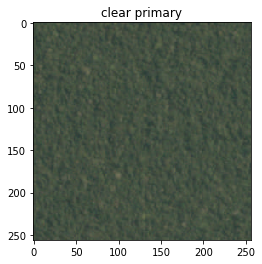

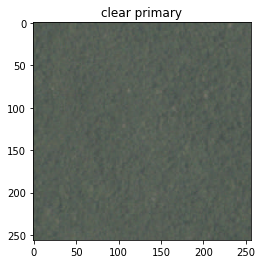

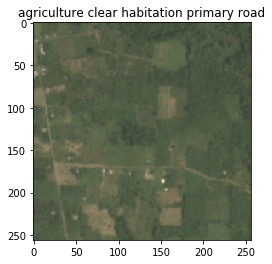

In [109]:
# Let's see how we did by inspection
for filename, prediction in random.choices(results, k=5):
    path = f'{PATH}test/{filename}.jpg'
    img = plt.imread(path)
    plt.figure()
    plt.imshow(img)
    plt.title(prediction)
